# Convolution Neural Networks

## Assignment 1:
- MNIST: This is one of the important databases for deep learning. Microsoft and Google lab researchers have reportedly contributed to this dataset of handwritten digits. It is basically constructed from NIST that contains binary images of handwritten digits.

- Dataset Info: The dataset contains 60,000 examples of the training set and 10,000 examples of the test set. There are four files in this dataset
- Download dataset from: http://yann.lecun.com/exdb/mnist/

### Task: Build an image classifier using the MNIST dataset. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# For TensorFlow/Keras
from tensorflow import keras
from keras import layers
from keras.utils import to_categorical

# Load your MNIST data (assuming you have it loaded as 'mnist')
# If you used sklearn's fetch_openml:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, parser='auto')

c:\Users\shoai\anaconda3\envs\aivenv\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
# Prepare the data
X = mnist['data']
y = mnist['target'].astype(int)

print(f"Dataset shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Dataset shape: (70000, 784)
Labels shape: (70000,)


In [3]:
# Normalize pixel values from 0-255 to 0-1
X = X / 255.0

# Reshape data for CNN: (samples, height, width, channels)
X = X.values.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_categorical = to_categorical(y, num_classes=10)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42
)

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")


Training set: (56000, 28, 28, 1)
Test set: (14000, 28, 28, 1)


In [4]:
# ============================================
# BUILD CNN MODEL
# ============================================

model = keras.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Second Convolutional Block
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Flatten and Dense Layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
model.summary()

c:\Users\shoai\anaconda3\envs\aivenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 597,738 (2.28 MB)

 Trainable params: 596,330 (2.27 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [5]:
# ============================================
# TRAIN THE MODEL
# ============================================

history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=15,
    validation_split=0.1,
    verbose=1
)

Epoch 1/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 83s 196ms/step - accuracy: 0.9415 - loss: 0.1927 - val_accuracy: 0.1434 - val_loss: 5.4752
Epoch 2/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 93s 236ms/step - accuracy: 0.9801 - loss: 0.0626 - val_accuracy: 0.9884 - val_loss: 0.0388
Epoch 3/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 82s 208ms/step - accuracy: 0.9852 - loss: 0.0464 - val_accuracy: 0.9923 - val_loss: 0.0307
Epoch 4/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 79s 201ms/step - accuracy: 0.9878 - loss: 0.0383 - val_accuracy: 0.9918 - val_loss: 0.0265
Epoch 5/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 69s 167ms/step - accuracy: 0.9890 - loss: 0.0346 - val_accuracy: 0.9929 - val_loss: 0.0274
Epoch 6/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 65s 166ms/step - accuracy: 0.9910 - loss: 0.0284 - val_accuracy: 0.9925 - val_loss: 0.0237
Epoch 7/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 88s 180ms/step - accuracy: 0.9912 - loss: 0.0276 - val_accuracy: 0.9909 - val_loss: 0.0286
Epoch 8/15
394/394 ━━━━━━━━━━━━━━━━━━━━ 86s 190ms/step - accuracy: 0.9920 - loss: 0

In [6]:
# ============================================
# EVALUATE THE MODEL
# ============================================

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))


Test Accuracy: 99.31%
Test Loss: 0.0230
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1343
           1       1.00      1.00      1.00      1600
           2       0.99      0.99      0.99      1380
           3       1.00      0.99      1.00      1433
           4       0.99      0.99      0.99      1295
           5       0.99      0.99      0.99      1273
           6       0.99      0.99      0.99      1396
           7       0.99      1.00      0.99      1503
           8       0.99      0.99      0.99      1357
           9       0.99      0.99      0.99      1420

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



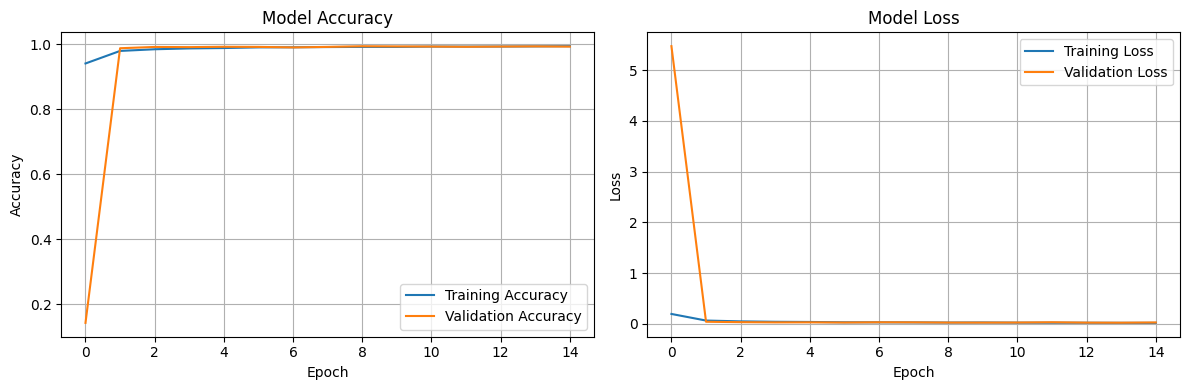

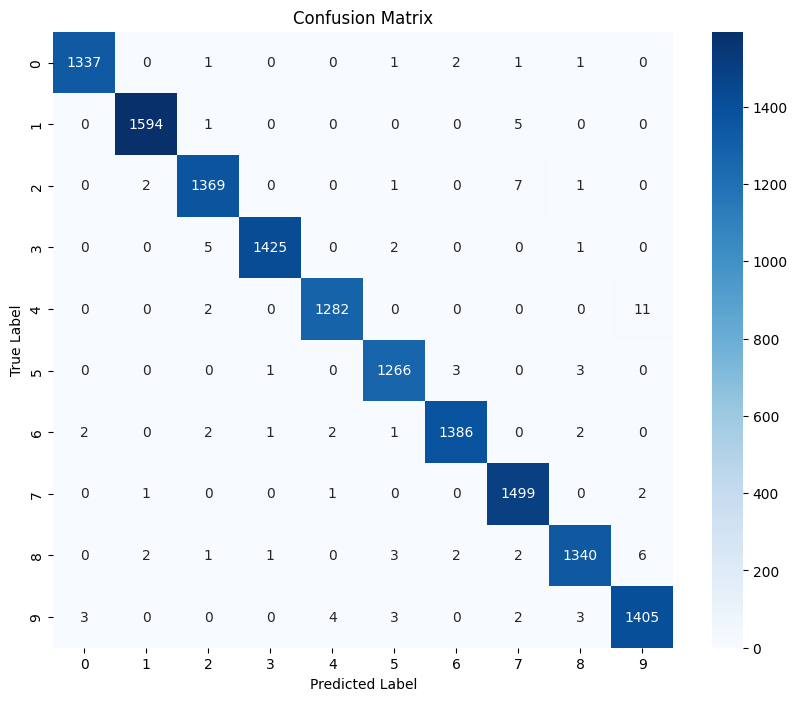

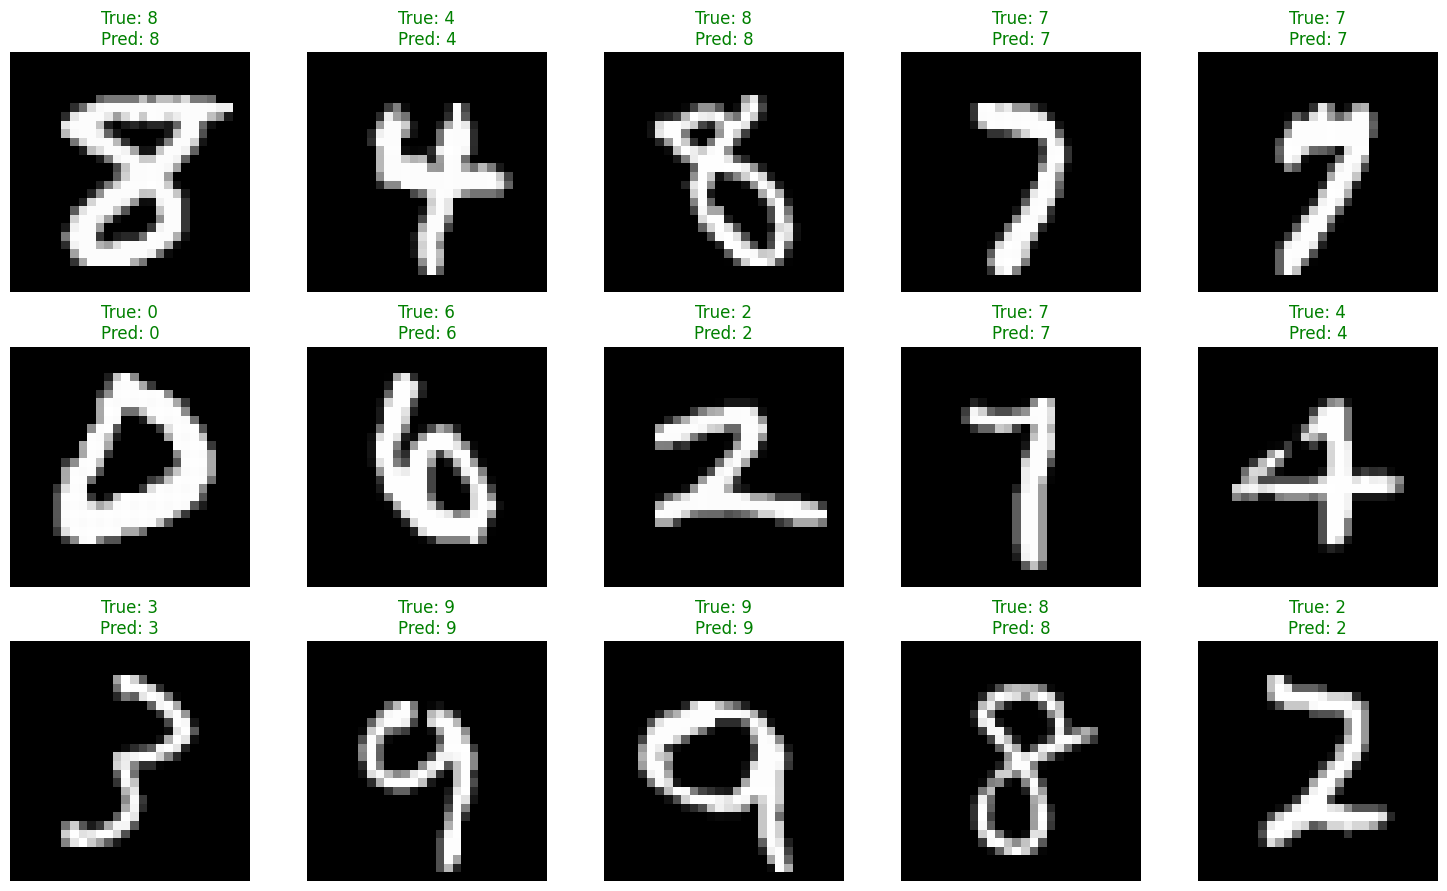

In [7]:
# ============================================
# VISUALIZE RESULTS
# ============================================

# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

# Loss plot
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Visualize some predictions
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.ravel()

for i in range(15):
    axes[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'True: {y_test_classes[i]}\nPred: {y_pred_classes[i]}')
    axes[i].axis('off')

    # Color the title based on correctness
    if y_test_classes[i] == y_pred_classes[i]:
        axes[i].title.set_color('green')
    else:
        axes[i].title.set_color('red')

plt.tight_layout()
plt.show()


MNIST MODEL TESTING

4. Test from numpy array:
   Usage: predict_from_array(your_array)


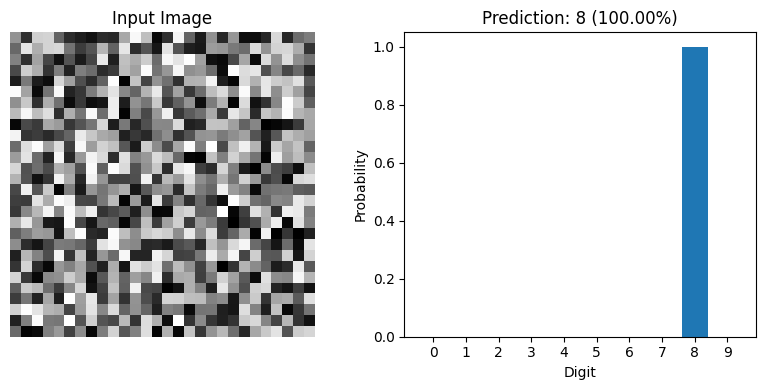

In [8]:
# ============================================
# TESTING MODEL: Test on Numpy Array
# ============================================

def predict_from_array(img_array):
    """Predict from a numpy array (28x28 or flattened 784)"""

    # Handle different input shapes
    if img_array.shape == (784,):
        img_array = img_array.reshape(28, 28)

    # Normalize if not already
    if img_array.max() > 1:
        img_array = img_array / 255.0

    # Reshape for model
    img_input = img_array.reshape(1, 28, 28, 1)

    # Predict
    prediction = model.predict(img_input, verbose=0)
    predicted_digit = np.argmax(prediction)
    confidence = prediction[0][predicted_digit]

    # Visualize
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title(f'Input Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.bar(range(10), prediction[0])
    plt.xlabel('Digit')
    plt.ylabel('Probability')
    plt.title(f'Prediction: {predicted_digit} ({confidence:.2%})')
    plt.xticks(range(10))

    plt.tight_layout()
    plt.show()

    return predicted_digit, confidence

# ============================================
# USAGE EXAMPLES
# ============================================

if __name__ == "__main__":

    print("\n" + "="*50)
    print("MNIST MODEL TESTING")
    print("="*50)

    print("\n4. Test from numpy array:")
    print("   Usage: predict_from_array(your_array)")
    # Example with random data:
    random_img = np.random.randint(0, 255, (28, 28))
    predict_from_array(random_img)


MNIST MODEL TESTING

3. Draw your own digit (Interactive):
   Launching drawing window...


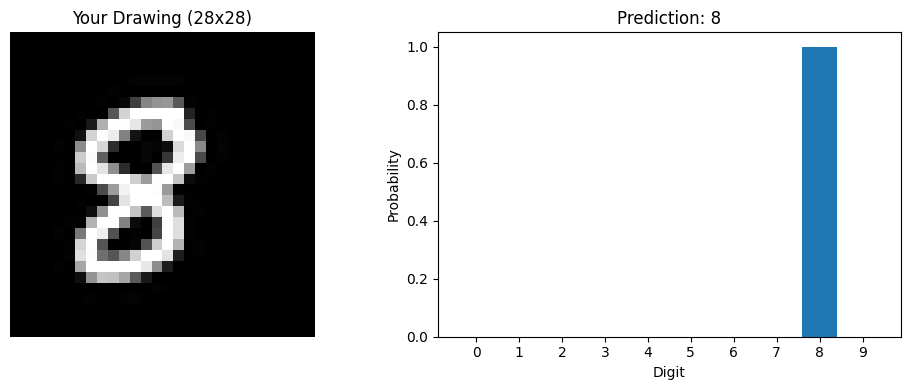

In [11]:
# ============================================
# TESTING MODEL: Draw Your Own Digit (Interactive)
# ============================================

def predict_drawn_digit():
    """Interactive drawing canvas to test the model"""

    import tkinter as tk
    from tkinter import Canvas, Button
    from PIL import Image, ImageDraw

    # Create window
    root = tk.Tk()
    root.title("Draw a Digit (0-9)")

    # Canvas size
    canvas_size = 280

    # Create canvas
    canvas = Canvas(root, width=canvas_size, height=canvas_size, bg='black')
    canvas.pack()

    # Create PIL image for drawing
    pil_image = Image.new('L', (canvas_size, canvas_size), 0)
    draw = ImageDraw.Draw(pil_image)

    def paint(event):
        x1, y1 = (event.x - 10), (event.y - 10)
        x2, y2 = (event.x + 10), (event.y + 10)
        canvas.create_oval(x1, y1, x2, y2, fill='white', outline='white')
        draw.ellipse([x1, y1, x2, y2], fill=255)

    def predict():
        # Resize to 28x28
        img_resized = pil_image.resize((28, 28), Image.Resampling.LANCZOS)

        # Convert to numpy array
        img_array = np.array(img_resized)

        # Normalize
        img_normalized = img_array / 255.0

        # Reshape for model
        img_input = img_normalized.reshape(1, 28, 28, 1)

        # Predict
        prediction = model.predict(img_input, verbose=0)
        predicted_digit = np.argmax(prediction)
        confidence = prediction[0][predicted_digit]

        # Show result
        result_text = f"Predicted: {predicted_digit} ({confidence:.2%})"
        result_label.config(text=result_text)

        # Visualize
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))

        axes[0].imshow(img_array, cmap='gray')
        axes[0].set_title('Your Drawing (28x28)')
        axes[0].axis('off')

        axes[1].bar(range(10), prediction[0])
        axes[1].set_xlabel('Digit')
        axes[1].set_ylabel('Probability')
        axes[1].set_title(f'Prediction: {predicted_digit}')
        axes[1].set_xticks(range(10))

        plt.tight_layout()
        plt.show()

    def clear():
        canvas.delete("all")
        pil_image.paste(0, [0, 0, canvas_size, canvas_size])
        result_label.config(text="Draw a digit and click Predict")

    # Bind mouse events
    canvas.bind('<B1-Motion>', paint)

    # Create buttons
    button_frame = tk.Frame(root)
    button_frame.pack()

    predict_button = Button(button_frame, text="Predict", command=predict, width=15)
    predict_button.pack(side=tk.LEFT, padx=5, pady=5)

    clear_button = Button(button_frame, text="Clear", command=clear, width=15)
    clear_button.pack(side=tk.LEFT, padx=5, pady=5)

    quit_button = Button(button_frame, text="Quit", command=root.destroy, width=15)
    quit_button.pack(side=tk.LEFT, padx=5, pady=5)

    # Result label
    result_label = tk.Label(root, text="Draw a digit and click Predict", font=("Arial", 14))
    result_label.pack(pady=10)

    root.mainloop()

if __name__ == "__main__":

    print("\n" + "="*50)
    print("MNIST MODEL TESTING")
    print("="*50)

    print("\n3. Draw your own digit (Interactive):")
    print("   Launching drawing window...")
    predict_drawn_digit()  # This will open an interactive window


2. Test on custom image:
   Usage: predict_custom_image('path/to/your/image.png')
   Example: predict_custom_image('digit_5.png')


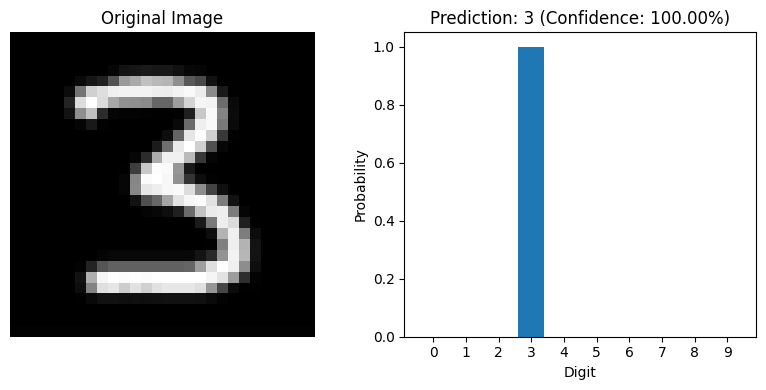


Predicted Digit: 3
Confidence: 100.00%

All probabilities:
  Digit 0: 0.0000 (0.00%)
  Digit 1: 0.0000 (0.00%)
  Digit 2: 0.0000 (0.00%)
  Digit 3: 1.0000 (100.00%)
  Digit 4: 0.0000 (0.00%)
  Digit 5: 0.0000 (0.00%)
  Digit 6: 0.0000 (0.00%)
  Digit 7: 0.0000 (0.00%)
  Digit 8: 0.0000 (0.00%)
  Digit 9: 0.0000 (0.00%)


In [15]:
# ============================================
# TESTING MODEL: Test on Custom Image File
# ============================================

from PIL import Image

def preprocess_custom_image(image_path):
    """Preprocess a custom image for prediction"""

    # Load image
    img = Image.open(image_path).convert('L')  # Convert to grayscale

    # Resize to 28x28
    img = img.resize((28, 28))

    # Convert to numpy array
    img_array = np.array(img)

    # Invert if needed (MNIST has white digits on black background)
    # If your image has black digits on white background, uncomment this:
    # img_array = 255 - img_array

    # Normalize
    img_array = img_array / 255.0

    # Reshape for model input
    img_array = img_array.reshape(1, 28, 28, 1)

    return img_array, img

def predict_custom_image(image_path):
    """Predict digit from a custom image file"""

    # Preprocess image
    processed_img, original_img = preprocess_custom_image(image_path)

    # Make prediction
    prediction = model.predict(processed_img, verbose=0)
    predicted_digit = np.argmax(prediction)
    confidence = prediction[0][predicted_digit]

    # Display result
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(original_img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.bar(range(10), prediction[0])
    plt.xlabel('Digit')
    plt.ylabel('Probability')
    plt.title(f'Prediction: {predicted_digit} (Confidence: {confidence:.2%})')
    plt.xticks(range(10))

    plt.tight_layout()
    plt.show()

    print(f"\nPredicted Digit: {predicted_digit}")
    print(f"Confidence: {confidence:.2%}")
    print("\nAll probabilities:")
    for i, prob in enumerate(prediction[0]):
        print(f"  Digit {i}: {prob:.4f} ({prob*100:.2f}%)")

    return predicted_digit, confidence

if __name__ == "__main__":
    print("\n2. Test on custom image:")
    print("   Usage: predict_custom_image('path/to/your/image.png')")
    print("   Example: predict_custom_image('digit_5.png')")
    # Uncomment and provide your image path:
    predict_custom_image('my_digit2.webp')

In [16]:
# Save the model
model.save('mnist_cnn_model.h5')
print("\nModel saved as 'mnist_cnn_model.h5'")


Model saved as 'mnist_cnn_model.h5'
